# Stroke Prediction using Machine Learning Models

Ini merupakan Python Notebook untuk Final Project Kelas Mahir Pejuang Data 3.0 Pusat Studi Data Science Matematika UAD

**Kelompok :**

1. Sintia Afriyani    | 2000015036
2. Tyas Kusuma Argani | 2000015032
3. Zulfatin Nafisah   | 2015015025
4. Galang Suryaputra  | 1900015062
5. Lisa Nuryanti      | 1900015056

**Instruktur :**

Joko Eliyanto, S.Si, M.Pd

## Latar Belakang Masalah

Sebanyak 10,9 per 1.000 penduduk Indonesia mengalami stroke per 2018. Angka ini menurun dari lima tahun sebelumnya, 12,10 per 1.000 penduduk dan meningkat dibandingkan tahun 2007, yakni 8,3 per 1.000 penduduk. Stroke terjadi karena ada gangguan aliran darah ke bagian otak. Bila ada daerah otak yang kekurangan pasokan darah secara tiba-tiba dan penderitanya mengalami gangguan sistem syaraf sesuai daerah otak yang terkena. Bentuknya dapat berupa lumpuh sebelah (hemiplegia), berkurangnya kekuatan sebelah anggota tubuh (hemiparesis), gangguan bicara, gangguan rasa (sensasi) di kulit sebelah wajah, lengan atau tungkai. (TS)

https://lokadata.beritagar.id/chart/preview/prevalensi-stroke-di-indonesia-2018-1563428312#:~:text=Prevalensi%20stroke%20di%20Indonesia%202018%20%2D%20Lokadata&text=Sebanyak%2010%2C9%20per%201.000,aliran%20darah%20ke%20bagian%20otak

## Problem Statement

Bagaimana membuat model machine learning untuk melakukan prediksi potensi stroke pada seseorang sebagai early warning dan pencegahan? 

## Import Library

Kita akan mulai dengan mengimpor library yang akan digunakan pada pemodelan ini.

In [46]:
# Basic Library
import numpy as np
import pandas as pd

# Visualizations Library
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing Library
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from imblearn.over_sampling import SMOTE

# Modelling Library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Model Evaluation Library
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score

# Additional Library
import pickle
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [47]:
df = pd.read_csv('https://github.com/TyasArgani/PSDS-Kelas-Mahir/raw/main/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [48]:
df.shape

(5110, 12)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [50]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Dataset Informations

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient


## Visualizations & Exploratory Data Analysis(EDA)

### 1. Pie Chart Target Label

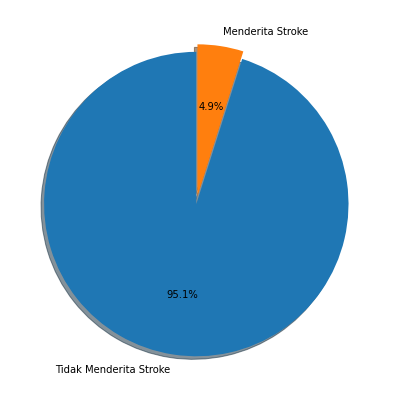

In [51]:
#Plotting the output column in a pie chart
labels = ['Tidak Menderita Stroke', 'Menderita Stroke']
sizes = df['stroke'].value_counts(sort = True)

#colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.show()

Terdapat 4,9 % dari dataset yang berlabel menderita stroke(1). Terlihat bahwa dataset ini merupakan dataset dengan jumlah label yang tidak seimbang. Perlu dilakukan perlakuan khusus untuk mengatasi hal ini.

### 2. Feature Correlation to Target Label

In [52]:
# Melakukan Data Encoding untuk keperluan visualisasi
le = LabelEncoder()
en_df = df.apply(le.fit_transform)
en_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3850,239,1,1
1,3610,0,82,0,0,1,3,0,3588,418,2,1
2,2151,1,101,0,1,1,2,0,2483,198,2,1
3,4226,0,70,0,0,1,2,1,3385,217,3,1
4,114,0,100,1,0,1,3,0,3394,113,2,1


Text(0, 1, 'Hubungan Kolom-kolom Fitur dengan Kolom Target')

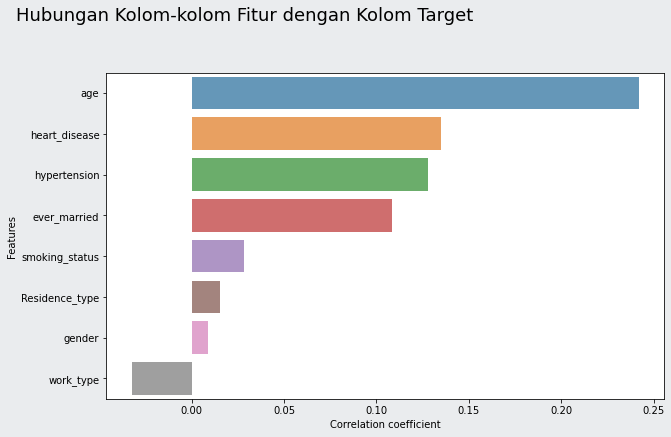

In [ ]:
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']

correlation_table = []
for cols in features:
    y = en_df["stroke"]
    x = en_df[cols]
    corr = np.corrcoef(x, y)[1][0]
    dict ={
        'Features': cols,
        'Correlation coefficient' : corr,
        'Feat_type': 'numerical'
    }
    correlation_table.append(dict)
dF1 = pd.DataFrame(correlation_table)

fig = plt.figure(figsize=(10,6), facecolor='#EAECEE')
ax = sns.barplot(x="Correlation coefficient", y="Features", 
                     data=dF1.sort_values("Correlation coefficient", ascending=False), alpha=0.75)


title =  'Hubungan Kolom-kolom Fitur dengan Kolom Target'


plt.gcf().text(0, 1, title, fontsize=18)

### 3. Density Plot Fitur Age

Text(-10, 0.015, 'Highest Density')

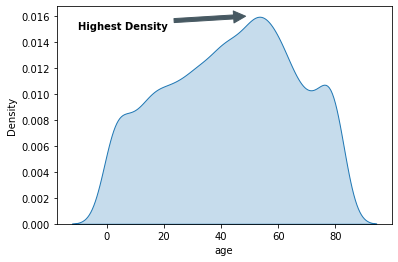

In [53]:
ax = sns.kdeplot(data=df, x='age', fill=True)
ax.annotate('Highest Density', weight='bold', xy=(50,0.016), xytext=(-10,0.015),
            arrowprops={'facecolor':'#475962', 'edgecolor':'#475962', 'shrink':0.05})

Berdasarkan plot di atas, dapat diketahui usia yang paling sering mengalami stroke adalah usia sekitar 50 tahun

### 4. Contour Plot Fitur Age

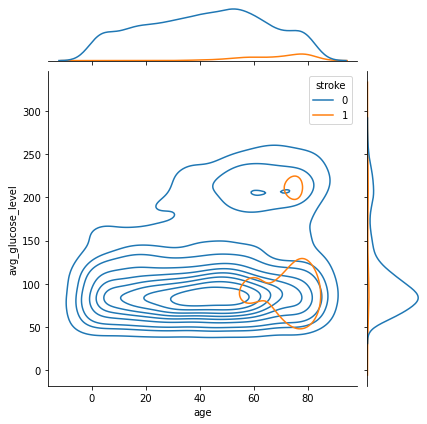

In [54]:
sns.jointplot(data=df, x='age', y='avg_glucose_level', hue='stroke', kind='kde', fill=False)

Berdasarkan visualisasi data di atas penderita stroke(garis orange) didonimasi oleh orang dengan usia antara 50-80(semakin tinggi semakin banyak) dengan rata-rata kadar gula antara 50-150, ada juga yang berada di rentang usia 70-80 rata-rata kada gula darah sekitar 200.

## Data Preprocesing

### 1.Handling Missing Value

In [55]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

fitur `bmi` memiliki missing value sebanyak 201 baris

In [56]:
# Mengisi missing value dengan rata-rata
df.bmi = df.bmi.fillna(np.mean(df.bmi))

In [57]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### 2.Endcoding untuk Fitur dengan tipe data Kategorikal

Kita memerlukan dataset bertipe numerik, untuk data bersifat  kategorikal, kita perlu melakukan data encoding.

In [58]:
enc = LabelEncoder()

In [59]:
gender=enc.fit_transform(df['gender'])
smoking_status=enc.fit_transform(df['smoking_status'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])

In [60]:
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender
df['work_type']=work_type

In [61]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


### 3. Mengubah Tipe Data Fitur Age

In [62]:
# Mengubah tipe data kolom Age menjadi integer
df['age']=df['age'].astype('int')

In [63]:
df.age.dtype

dtype('int64')

### 4. Data Splitting (X dan Y)

Membagi data menjadi data X(fitur input) dan Y(target output)

In [64]:
X = df.drop('stroke',axis=1)
y = df["stroke"]

### 5. Data Splitting (Training & Testing)

Membagi data menjadi data training dan data testing

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

### 6. Data Scaling

Melakukan penyeragaman rentang data(data scalling)

In [66]:
sc = StandardScaler()

In [67]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 7. Oversampling 

Untuk mengatasi data yang tidak seimbang, kita akan melakukan oversampling, yaitu mengenerati data yang jumlahnya lebih kecil untuk menyamai jumlah data lainnya yang lebih banyak.

In [68]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 181
Before OverSampling, counts of label '0': 3396 

After OverSampling, the shape of train_X: (6792, 11)
After OverSampling, the shape of train_y: (6792,) 

After OverSampling, counts of label '1': 3396
After OverSampling, counts of label '0': 3396


## Modelling

### 1. Classic Machine Learning Models

In [69]:
all_model = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(),
            RandomForestClassifier(), BernoulliNB(), SVC()]

In [ ]:
recall = []
accuracy = []

for model in all_model:
    cv = cross_val_score(model, X_train_res, y_train_res, scoring='recall', cv=10).mean()
    recall.append(cv)

    cv = cross_val_score(model, X_train_res, y_train_res, scoring='accuracy', cv=10).mean()
    accuracy.append(cv)

In [ ]:
model = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier',
         'RandomForestClassifier', 'BernoulliNB', 'SVC']

score = pd.DataFrame({'Model': model, 'Accuracy': accuracy, 'Recall': recall})
score.style.background_gradient(high=1,axis=0)

Berdasarkan hasil di atas, kami memilih model RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [36]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [ ]:
y_train_res

In [ ]:
yt=pd.DataFrame(y_test)

In [39]:
yt.value_counts()

stroke
0         1465
1           68
dtype: int64

In [40]:
y_pred = rf.predict(X_test)

In [41]:
cf_matrix = confusion_matrix(y_test, y_pred, labels=(0,1))

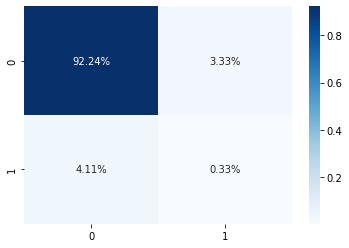

In [42]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1465
           1       0.09      0.07      0.08        68

    accuracy                           0.93      1533
   macro avg       0.52      0.52      0.52      1533
weighted avg       0.92      0.93      0.92      1533



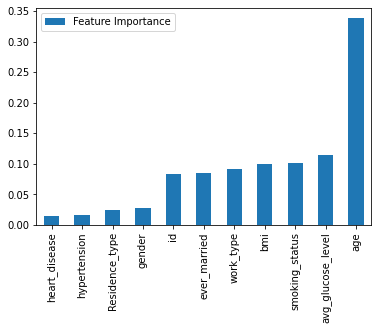

In [44]:
pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Feature Importance']).sort_values(by='Feature Importance').plot.bar()

### 2. Ensemmble Machine Leaning Models

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_res, y_train_res)

XGBClassifier()

In [ ]:
accuracy_score(y_test, y_pred)

0.9315068493150684

In [ ]:
recall_score(y_test, y_pred)

0.11764705882352941

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred, labels=(0,1))

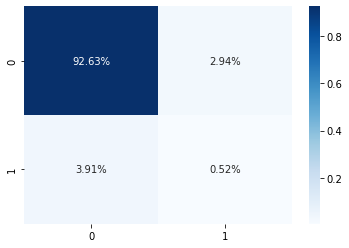

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1465
           1       0.15      0.12      0.13        68

    accuracy                           0.93      1533
   macro avg       0.56      0.54      0.55      1533
weighted avg       0.92      0.93      0.93      1533



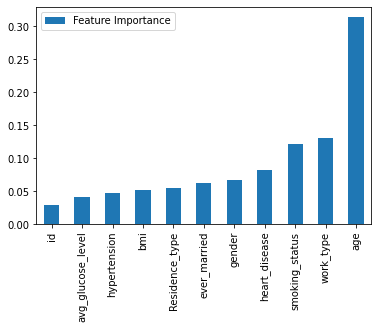

In [ ]:
pd.DataFrame(xgb_model.feature_importances_, index=X.columns, columns=['Feature Importance']).sort_values(by='Feature Importance').plot.bar()

## Save & Deploy Model

In [ ]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_RF_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf, file)

In [ ]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_RF_Model = pickle.load(file)

Pickled_RF_Model

RandomForestClassifier()

In [ ]:
# Use the Reloaded Model to 
# Predict the Labels using the reloaded Model
y_pred = Pickled_RF_Model.predict(X_test)  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1465
           1       0.15      0.12      0.13        68

    accuracy                           0.93      1533
   macro avg       0.56      0.54      0.55      1533
weighted avg       0.92      0.93      0.93      1533



##Conclusion

setelah dilakukan perhitungan menggunakan 6 metode , model klasifikasi random forest memberikan tingkat akurasi dan recall yang paling tinggi yaitu 0.967617 dan 0.976463. selain itu pada confusion matrix nilai true positif memberikan tingkat keakuratan yang tinggi yaitu sebesar 92.56%.